# Newcastle Dummy Dataset Using H2O.ai
**By: Amr Ezzat**

## IMPORT RESOURCES

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,18 days 22 hours 59 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.275 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [2]:
# Fetching dataset 
newcastle_ds = h2o.import_file('/Users/home/Documents/Downloads/Newcastle.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# Checking the dataset was imported successfully 
newcastle_ds 

University,Student ID,Course,Grade (Class),Internship,Job within 6 months
Newcastle University,1,Dance,Second Lower,4,TRUE
Newcastle University,2,History,Second Lower,2,FALSE
Newcastle University,3,History,Third,4,TRUE
Newcastle University,4,Geography,Third,2,FALSE
Newcastle University,5,History,Second Lower,4,TRUE
Newcastle University,6,Computer Science,Second Lower,4,TRUE
Newcastle University,7,Computer Science,First,4,TRUE
Newcastle University,8,Geography,Second Lower,0,FALSE
Newcastle University,9,Computer Science,Third,1,TRUE
Newcastle University,10,Dance,Third,1,FALSE


In [4]:
#Checking Number of columns and rows are correct and no missing data
newcastle_ds.describe()

Rows:1000
Cols:6




,University,Student ID,Course,Grade (Class),Internship,Job within 6 months
type,enum,int,enum,enum,int,enum
mins,,1.0,,,0.0,
mean,,500.5,,,1.9999999999999991,
maxs,,1000.0,,,4.0,
sigma,,288.8194360957494,,,1.412797223948291,
zeros,,0,,,195,
missing,0,0,0,0,0,0
0,Newcastle University,1.0,Dance,Second Lower,4.0,TRUE
1,Newcastle University,2.0,History,Second Lower,2.0,FALSE
2,Newcastle University,3.0,History,Third,4.0,TRUE


In [5]:
# Arrange data (Remove'Job within 6 months', set 'Job within 6 months' 
# as the value I want to predict)
y = "Job within 6 months"
x = newcastle_ds.columns
x.remove(y)

## TRAIN TEST SPLIT

In [6]:
# Splitting data 80% training data 20% test data
n_train,n_test= newcastle_ds.split_frame(ratios=[.8])

In [7]:
# Checking the split was done properly
n_train.describe()

Rows:804
Cols:6




,University,Student ID,Course,Grade (Class),Internship,Job within 6 months
type,enum,int,enum,enum,int,enum
mins,,2.0,,,0.0,
mean,,499.5808457711438,,,2.0174129353233807,
maxs,,1000.0,,,4.0,
sigma,,290.712290841148,,,1.4167457048324652,
zeros,,0,,,158,
missing,0,0,0,0,0,0
0,Newcastle University,2.0,History,Second Lower,2.0,FALSE
1,Newcastle University,3.0,History,Third,4.0,TRUE
2,Newcastle University,4.0,Geography,Third,2.0,FALSE


## H2O.ai

In [51]:
aml = H2OAutoML(max_runtime_secs = 600, seed = 45, verbosity="info")
aml.train(x=x, y=y, training_frame=n_train)


18:07:57.456: Project: AutoML_20210429_180757456
18:07:57.456: Setting stopping tolerance adaptively based on the training frame: 0.035267280792929914
18:07:57.456: Build control seed: 45
18:07:57.457: training frame: Frame key: automl_training_py_2_sid_a2d8    cols: 6    rows: 804  chunks: 1    size: 7479  checksum: -476480808460449095
18:07:57.457: validation frame: NULL
18:07:57.457: leaderboard frame: NULL
18:07:57.457: blending frame: NULL
18:07:57.457: response column: Job within 6 months
18:07:57.457: fold column: null
18:07:57.457: weights column: null
18:07:57.457: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {StackedEnsemble : defaults}]
18:07:57.458: AutoML job created: 2021.04.29 18:07:57.456
18:07:57.466: AutoML build started: 2021.04.29 18:07:57.466
18:07:57.473: AutoML

## VISUAL RESULT 

In [52]:
#Leaderboard
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20210429_180757_model_31,1,0.112823,1,0,0.131212,0.0172165
XGBoost_1_AutoML_20210429_180757,1,0.0521786,1,0,0.0646933,0.00418522
XGBoost_grid__1_AutoML_20210429_180757_model_3,1,0.0772223,1,0,0.0877654,0.00770276
XGBoost_grid__1_AutoML_20210429_180757_model_11,1,0.0517925,1,0,0.0613293,0.00376128
GBM_grid__1_AutoML_20210429_180757_model_4,1,6.68343e-17,1,0,1.2182e-16,1.48402e-32
StackedEnsemble_BestOfFamily_AutoML_20210429_180757,1,0.000634242,1,0,0.00076475,5.84842e-07
XGBoost_grid__1_AutoML_20210429_180757_model_38,1,0.0862491,1,0,0.101462,0.0102946
XGBoost_grid__1_AutoML_20210429_180757_model_6,1,0.00996655,1,0,0.0117453,0.000137951
XGBoost_grid__1_AutoML_20210429_180757_model_24,1,0.0249534,1,0,0.0318515,0.00101452
DeepLearning_grid__3_AutoML_20210429_180757_model_4,1,2.25695e-06,1,0,1.36844e-05,1.87262e-10


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid__1_AutoML_20210429_180757_model_31,1,0.112823,1,0,0.131212,0.0172165,243,0.060543,XGBoost
XGBoost_1_AutoML_20210429_180757,1,0.0521786,1,0,0.0646933,0.00418522,269,0.02353,XGBoost
XGBoost_grid__1_AutoML_20210429_180757_model_3,1,0.0772223,1,0,0.0877654,0.00770276,561,0.025811,XGBoost
XGBoost_grid__1_AutoML_20210429_180757_model_11,1,0.0517925,1,0,0.0613293,0.00376128,154,0.023311,XGBoost
GBM_grid__1_AutoML_20210429_180757_model_4,1,6.68343e-17,1,0,1.2182e-16,1.48402e-32,1497,0.140526,GBM
StackedEnsemble_BestOfFamily_AutoML_20210429_180757,1,0.000634242,1,0,0.00076475,5.84842e-07,382,0.364997,StackedEnsemble
XGBoost_grid__1_AutoML_20210429_180757_model_38,1,0.0862491,1,0,0.101462,0.0102946,166,0.079357,XGBoost
XGBoost_grid__1_AutoML_20210429_180757_model_6,1,0.00996655,1,0,0.0117453,0.000137951,345,0.036897,XGBoost
XGBoost_grid__1_AutoML_20210429_180757_model_24,1,0.0249534,1,0,0.0318515,0.00101452,504,0.043886,XGBoost
DeepLearning_grid__3_AutoML_20210429_180757_model_4,1,2.25695e-06,1,0,1.36844e-05,1.87262e-10,74,0.054292,DeepLearning


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid__1_AutoML_20210429_180757_model_31


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8532208204269409: 


,,FALSE,TRUE,Error,Rate
0,FALSE,225.0,0.0,0.0,(0.0/225.0)
1,TRUE,0.0,579.0,0.0,(0.0/579.0)
2,Total,225.0,579.0,0.0,(0.0/804.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

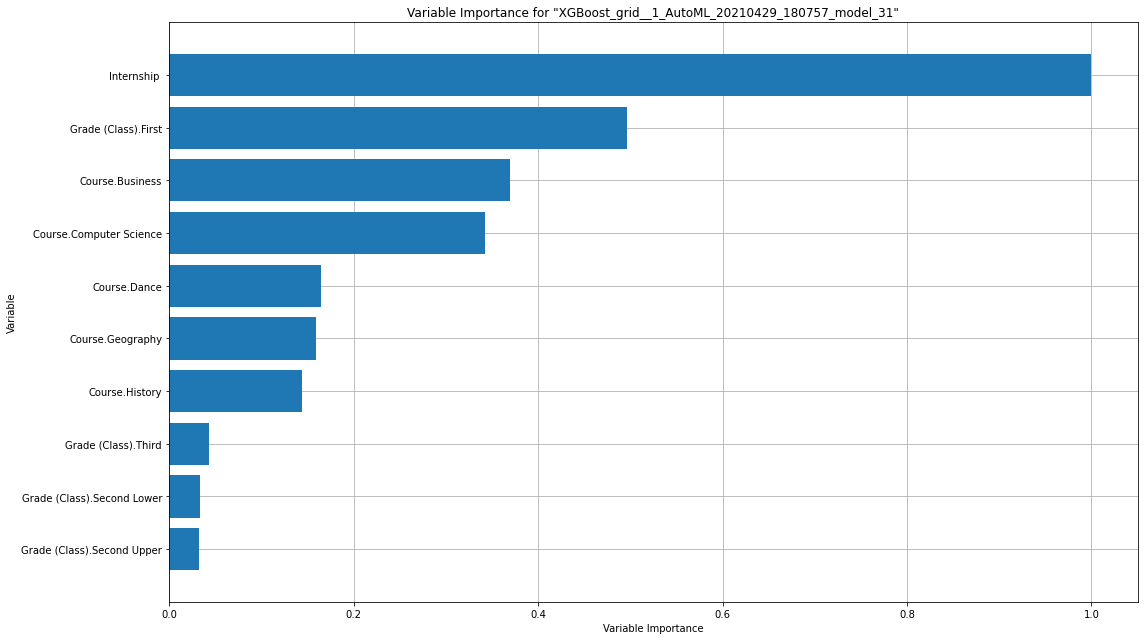

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

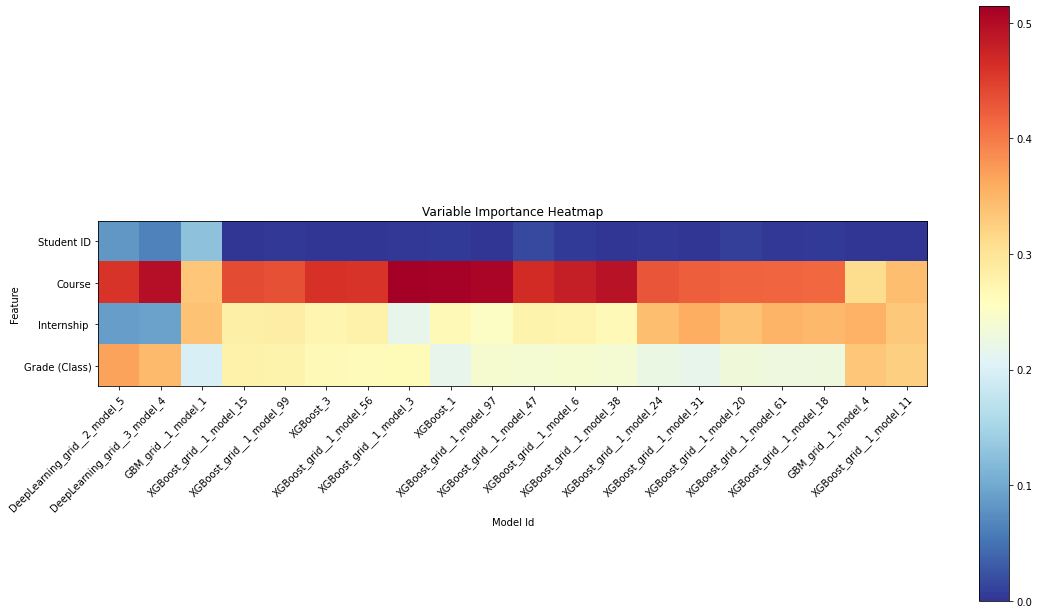

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

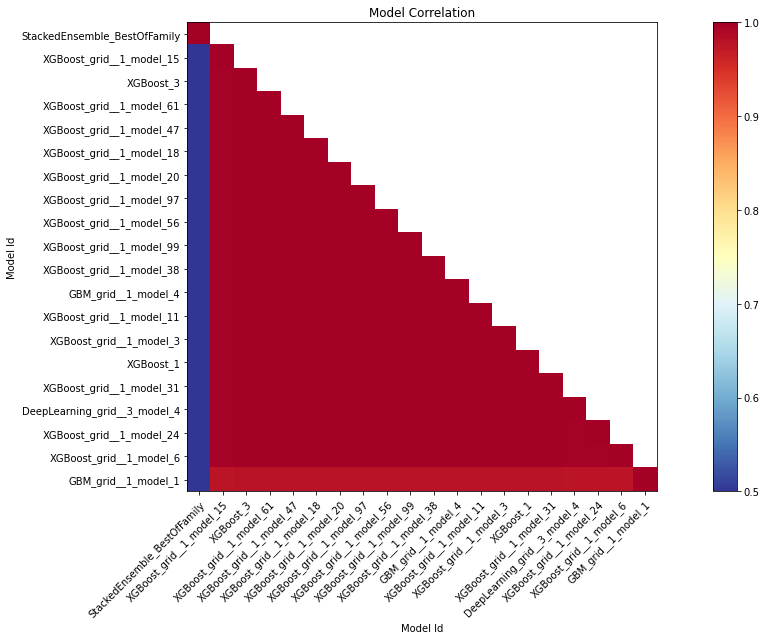

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

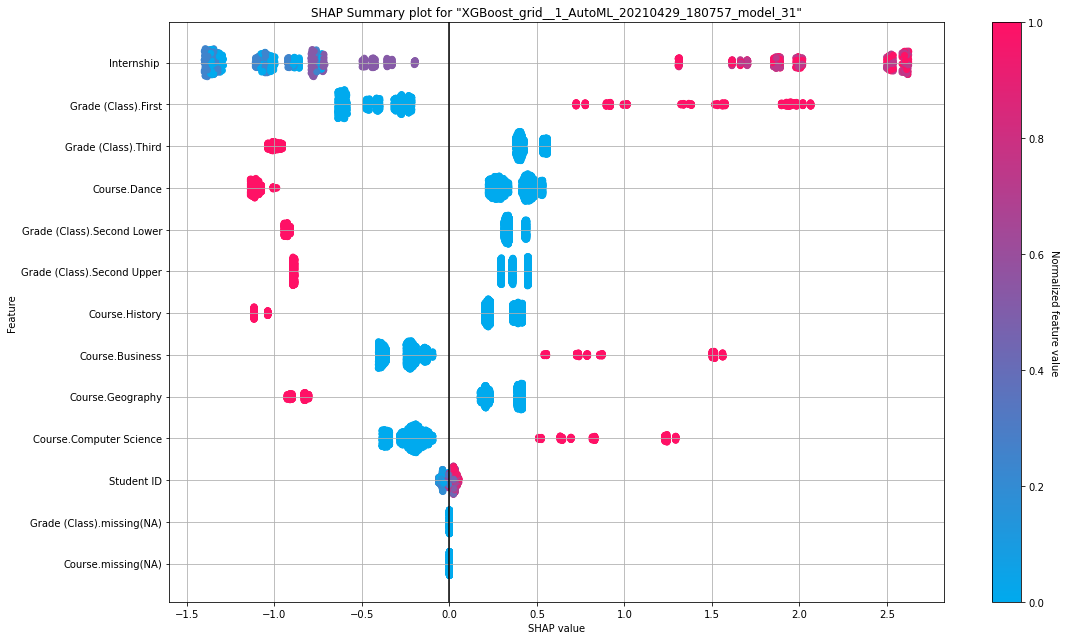

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

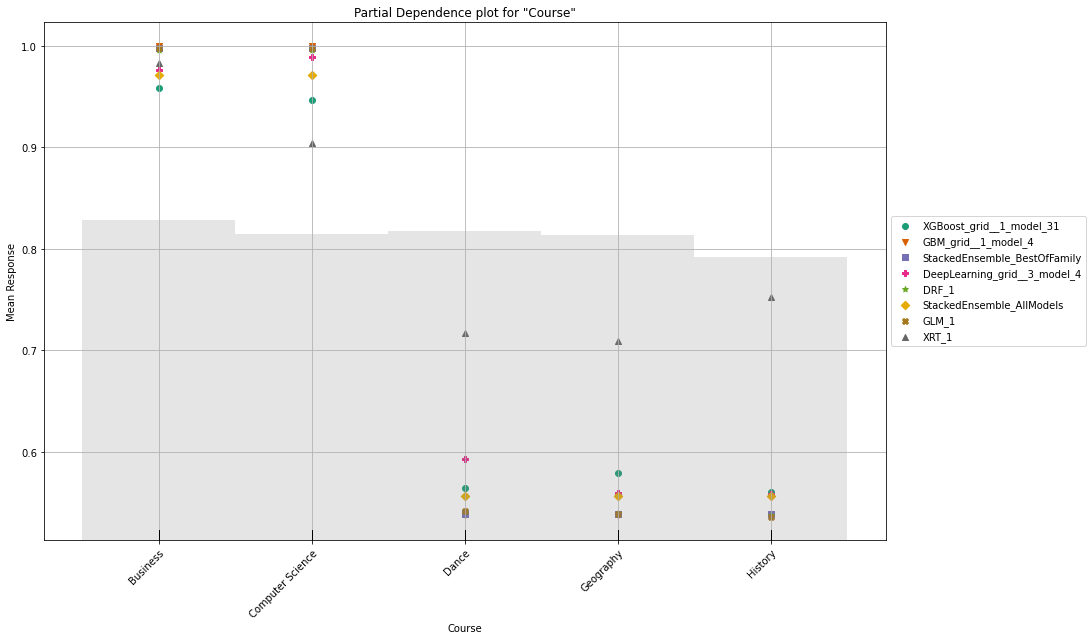

H2OServerError: HTTP 500 Server Error:
Server error java.lang.NullPointerException:
  Error: Caught exception: java.lang.NullPointerException
  Request: None


<Figure size 1152x648 with 0 Axes>

In [53]:
exa = aml.explain(newcastle_ds)

In [55]:
# Get the leading pipeline and store it in a variable 
leader= aml.leader 
leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210429_180757_model_31


Model Summary: 


,,number_of_trees
0,,62.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.007945490968153092
RMSE: 0.08913748351929783
LogLoss: 0.07575087074693647
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8532208204269409: 


,,FALSE,TRUE,Error,Rate
0,FALSE,225.0,0.0,0.0,(0.0/225.0)
1,TRUE,0.0,579.0,0.0,(0.0/579.0)
2,Total,225.0,579.0,0.0,(0.0/804.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.853221,1.000000,175.0
1,max f2,0.853221,1.000000,175.0
2,max f0point5,0.853221,1.000000,175.0
3,max accuracy,0.853221,1.000000,175.0
4,max precision,0.998503,1.000000,0.0
5,max recall,0.853221,1.000000,175.0
6,max specificity,0.998503,1.000000,0.0
7,max absolute_mcc,0.853221,1.000000,175.0
8,max min_per_class_accuracy,0.853221,1.000000,175.0
9,max mean_per_class_accuracy,0.853221,1.000000,175.0



Gains/Lift Table: Avg response rate: 72.01 %, avg score: 72.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011194,0.998459,1.388601,1.388601,1.000000,0.998469,1.000000,0.998469,0.015544,0.015544,38.860104,38.860104,0.015544
1,2,0.027363,0.998401,1.388601,1.388601,1.000000,0.998417,1.000000,0.998438,0.022453,0.037997,38.860104,38.860104,0.037997
2,3,0.036070,0.998371,1.388601,1.388601,1.000000,0.998372,1.000000,0.998423,0.012090,0.050086,38.860104,38.860104,0.050086
3,4,0.044776,0.998308,1.388601,1.388601,1.000000,0.998308,1.000000,0.998400,0.012090,0.062176,38.860104,38.860104,0.062176
4,5,0.053483,0.997746,1.388601,1.388601,1.000000,0.997746,1.000000,0.998294,0.012090,0.074266,38.860104,38.860104,0.074266
5,6,0.101990,0.995269,1.388601,1.388601,1.000000,0.996506,1.000000,0.997443,0.067358,0.141623,38.860104,38.860104,0.141623
6,7,0.155473,0.990630,1.388601,1.388601,1.000000,0.991339,1.000000,0.995344,0.074266,0.215889,38.860104,38.860104,0.215889
7,8,0.200249,0.990170,1.388601,1.388601,1.000000,0.990435,1.000000,0.994246,0.062176,0.278066,38.860104,38.860104,0.278066
8,9,0.304726,0.964323,1.388601,1.388601,1.000000,0.986233,1.000000,0.991499,0.145078,0.423143,38.860104,38.860104,0.423143
9,10,0.406716,0.942187,1.388601,1.388601,1.000000,0.952115,1.000000,0.981623,0.141623,0.564767,38.860104,38.860104,0.564767




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.017216514162140664
RMSE: 0.13121171503391252
LogLoss: 0.11282321792341857
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7930521965026855: 


,,FALSE,TRUE,Error,Rate
0,FALSE,225.0,0.0,0.0,(0.0/225.0)
1,TRUE,0.0,579.0,0.0,(0.0/579.0)
2,Total,225.0,579.0,0.0,(0.0/804.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.793052,1.000000,257.0
1,max f2,0.793052,1.000000,257.0
2,max f0point5,0.793052,1.000000,257.0
3,max accuracy,0.793052,1.000000,257.0
4,max precision,0.998412,1.000000,0.0
5,max recall,0.793052,1.000000,257.0
6,max specificity,0.998412,1.000000,0.0
7,max absolute_mcc,0.793052,1.000000,257.0
8,max min_per_class_accuracy,0.793052,1.000000,257.0
9,max mean_per_class_accuracy,0.793052,1.000000,257.0



Gains/Lift Table: Avg response rate: 72.01 %, avg score: 72.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012438,0.998087,1.388601,1.388601,1.000000,0.998277,1.000000,0.998277,0.017271,0.017271,38.860104,38.860104,0.017271
1,2,0.021144,0.998048,1.388601,1.388601,1.000000,0.998063,1.000000,0.998189,0.012090,0.029361,38.860104,38.860104,0.029361
2,3,0.032338,0.997626,1.388601,1.388601,1.000000,0.997840,1.000000,0.998068,0.015544,0.044905,38.860104,38.860104,0.044905
3,4,0.041045,0.997328,1.388601,1.388601,1.000000,0.997383,1.000000,0.997923,0.012090,0.056995,38.860104,38.860104,0.056995
4,5,0.050995,0.996090,1.388601,1.388601,1.000000,0.996531,1.000000,0.997651,0.013817,0.070812,38.860104,38.860104,0.070812
5,6,0.101990,0.993155,1.388601,1.388601,1.000000,0.994757,1.000000,0.996204,0.070812,0.141623,38.860104,38.860104,0.141623
6,7,0.151741,0.991103,1.388601,1.388601,1.000000,0.992048,1.000000,0.994841,0.069085,0.210708,38.860104,38.860104,0.210708
7,8,0.202736,0.987750,1.388601,1.388601,1.000000,0.989995,1.000000,0.993622,0.070812,0.281520,38.860104,38.860104,0.281520
8,9,0.299751,0.954298,1.388601,1.388601,1.000000,0.979297,1.000000,0.988986,0.134715,0.416235,38.860104,38.860104,0.416235
9,10,0.400498,0.921051,1.388601,1.388601,1.000000,0.933682,1.000000,0.975074,0.139896,0.556131,38.860104,38.860104,0.556131




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,auc,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,aucpr,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,err,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,err_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,f0point5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,f1,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,f2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,lift_top_group,1.3909435,0.06296398,1.4247788,1.3644068,1.4636364,1.298387,1.4035088
9,logloss,0.11280123,0.013073268,0.11529017,0.10413812,0.12639023,0.123062454,0.09512517



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-04-29 18:09:45,55.981 sec,0.0,0.500000,0.693147,0.5,0.720149,1.000000,0.279851
1,,2021-04-29 18:09:45,55.992 sec,5.0,0.230256,0.253246,1.0,1.000000,1.388601,0.000000
2,,2021-04-29 18:09:45,56.002 sec,10.0,0.139702,0.136543,1.0,1.000000,1.388601,0.000000
3,,2021-04-29 18:09:45,56.014 sec,15.0,0.115886,0.107573,1.0,1.000000,1.388601,0.000000
4,,2021-04-29 18:09:45,56.025 sec,20.0,0.107577,0.096844,1.0,1.000000,1.388601,0.000000
5,,2021-04-29 18:09:45,56.040 sec,25.0,0.103603,0.091742,1.0,1.000000,1.388601,0.000000
6,,2021-04-29 18:09:45,56.054 sec,30.0,0.099611,0.087382,1.0,1.000000,1.388601,0.000000
7,,2021-04-29 18:09:45,56.073 sec,35.0,0.096090,0.084211,1.0,1.000000,1.388601,0.000000
8,,2021-04-29 18:09:45,56.105 sec,40.0,0.093788,0.081653,1.0,1.000000,1.388601,0.000000
9,,2021-04-29 18:09:45,56.131 sec,45.0,0.091668,0.079694,1.0,1.000000,1.388601,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Internship,516.334778,1.000000,0.358376
1,Grade (Class).First,256.126007,0.496046,0.177771
2,Course.Business,190.825394,0.369577,0.132448
3,Course.Computer Science,176.734055,0.342286,0.122667
4,Course.Dance,84.812302,0.164258,0.058866
5,Course.Geography,82.293831,0.159381,0.057118
6,Course.History,74.542374,0.144368,0.051738
7,Grade (Class).Third,22.596165,0.043763,0.015683
8,Grade (Class).Second Lower,17.501368,0.033895,0.012147
9,Grade (Class).Second Upper,16.914551,0.032759,0.011740


In [56]:
# Get the variable importance
leader.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,Internship,516.334778,1.000000,0.358376
1,Grade (Class).First,256.126007,0.496046,0.177771
2,Course.Business,190.825394,0.369577,0.132448
3,Course.Computer Science,176.734055,0.342286,0.122667
4,Course.Dance,84.812302,0.164258,0.058866
5,Course.Geography,82.293831,0.159381,0.057118
6,Course.History,74.542374,0.144368,0.051738
7,Grade (Class).Third,22.596165,0.043763,0.015683
8,Grade (Class).Second Lower,17.501368,0.033895,0.012147
9,Grade (Class).Second Upper,16.914551,0.032759,0.011740


In [57]:
# Export Mojo file
aml.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/XGBoost_grid__1_AutoML_20210429_180757_model_31.zip'